In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras

2022-06-02 11:51:06.404126: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-02 11:51:06.404147: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## data prep

In [15]:
keras.__version__

'2.9.0'

In [2]:
df = pd.read_csv("data/possum.csv").dropna()
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [31]:
df.shape

(101, 14)

In [3]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [4]:
y = df.age.values
y

array([8., 6., 6., 6., 2., 1., 2., 6., 9., 6., 9., 5., 5., 3., 5., 4., 1.,
       2., 5., 4., 3., 3., 4., 2., 3., 7., 2., 4., 3., 2., 3., 4., 3., 2.,
       4., 7., 2., 7., 1., 3., 3., 2., 3., 2., 5., 4., 5., 5., 6., 3., 7.,
       2., 3., 4., 3., 2., 2., 7., 3., 6., 3., 5., 3., 4., 5., 5., 7., 6.,
       1., 1., 4., 6., 5., 6., 1., 1., 1., 3., 4., 3., 3., 3., 3., 2., 2.,
       6., 3., 3., 2., 3., 7., 4., 4., 3., 5., 3., 1., 1., 6., 4., 3.])

In [5]:
sex = (df.sex.values == "f") + 0.
sex = sex.reshape(-1, 1)

In [6]:
x = np.hstack((df.iloc[:, 5:].values, sex))
x

array([[94.1, 60.4, 89. , ..., 28. , 36. ,  0. ],
       [92.5, 57.6, 91.5, ..., 28.5, 33. ,  1. ],
       [94. , 60. , 95.5, ..., 30. , 34. ,  1. ],
       ...,
       [92.4, 55. , 89. , ..., 25. , 30. ,  1. ],
       [91.5, 55.2, 82.5, ..., 25. , 29. ,  0. ],
       [93.6, 59.9, 89. , ..., 28.5, 33.5,  1. ]])

In [7]:
# take mean to standardize vector
mu = x.mean(axis=0)
print('mu', mu)
sigma = x.std(axis=0)
print('sigma', sigma)

mu [92.73069307 56.96039604 87.26930693 37.04950495 68.3980198  48.13366337
 15.05049505 27.06435644 32.63861386  0.41584158]
sigma [3.50125133 3.08728081 4.17597425 1.96189562 4.39159819 4.04020089
 1.05338904 2.0106934  2.71420795 0.49286647]


In [8]:
x = (x-mu)/sigma
x

array([[ 0.39109073,  1.11412086,  0.41444055, ...,  0.46533378,
         1.2384409 , -0.84372057],
       [-0.06588875,  0.20717389,  1.01310325, ...,  0.71400422,
         0.13314608,  1.18522652],
       [ 0.36252951,  0.98455701,  1.97096356, ...,  1.46001552,
         0.50157768,  1.18522652],
       ...,
       [-0.09444997, -0.63499116,  0.41444055, ..., -1.02668882,
        -0.97214875,  1.18522652],
       [-0.35150092, -0.57020924, -1.14208246, ..., -1.02668882,
        -1.34058036, -0.84372057],
       [ 0.24828464,  0.95216604,  0.41444055, ...,  0.71400422,
         0.31736188,  1.18522652]])

In [9]:
x.shape, x.dtype

((101, 10), dtype('float64'))

In [10]:
y.shape, y.dtype

((101,), dtype('float64'))

## Deep learning

In [11]:
# create model
neural = keras.models.Sequential()

# add input layer
neural.add(keras.layers.InputLayer(input_shape=(10,)))  # use 10, to add as tuple, we have 10 samples

# add hidden layer
neural.add(keras.layers.Dense(units=64, activation='relu'))
neural.add(keras.layers.Dense(units=16, activation='relu'))

# normally linear, but relu doesn't predict negative values, thus possible
neural.add(keras.layers.Dense(units=1, activation='linear'))
# neural.add(keras.layers.Activation(activation=keras.activation.linear))

2022-06-02 11:51:15.386242: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-02 11:51:15.386303: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-02 11:51:15.386322: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nuc417.bin.bioinf.nl): /proc/driver/nvidia/version does not exist
2022-06-02 11:51:15.386566: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
neural.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.SGD())
neural.fit(
    x=x,
    y=y,
    epochs=1000)
# verbose=0

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1776
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1495
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1598
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2310
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2016
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2709
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1586
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1819
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1404
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1425
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1549
Epoch 13/1000
4/4 [==============================

4/4 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 104/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0565
Epoch 105/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0334
Epoch 106/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0325
Epoch 107/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0355
Epoch 108/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0394
Epoch 109/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0631
Epoch 110/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0416
Epoch 111/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0298
Epoch 112/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 113/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0431
Epoch 114/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0308
Epoch 115/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 205/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 206/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 207/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 208/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 209/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 210/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 211/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 212/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 213/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 214/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 215/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 216/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 306/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 307/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 308/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 309/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 310/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 311/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 312/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 313/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 314/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 315/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 316/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 317/1000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 406/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.0445e-04
Epoch 407/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.1975e-04
Epoch 408/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 409/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 410/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1755e-04
Epoch 411/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 412/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.3220e-04
Epoch 413/1000
4/4 [==============================] - 0s 1ms/step - loss: 6.2516e-04
Epoch 414/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.7918e-04
Epoch 415/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 416/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 417/1000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 7.0373e-04
Epoch 503/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.9246e-04
Epoch 504/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.4432e-04
Epoch 505/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.3083e-04
Epoch 506/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.3317e-04
Epoch 507/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.1341e-04
Epoch 508/1000
4/4 [==============================] - 0s 1ms/step - loss: 8.9725e-04
Epoch 509/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.3042e-04
Epoch 510/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.8699e-04
Epoch 511/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.2538e-04
Epoch 512/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.0010e-04
Epoch 513/1000
4/4 [==============================] - 0s 1ms/step - loss: 2.3394

4/4 [==============================] - 0s 2ms/step - loss: 8.6587e-05
Epoch 599/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.7418e-04
Epoch 600/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.3698e-04
Epoch 601/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.3105e-04
Epoch 602/1000
4/4 [==============================] - 0s 1ms/step - loss: 9.5759e-04
Epoch 603/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.9072e-04
Epoch 604/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.8336e-04
Epoch 605/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.3280e-04
Epoch 606/1000
4/4 [==============================] - 0s 1ms/step - loss: 8.0802e-05
Epoch 607/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.2755e-04
Epoch 608/1000
4/4 [==============================] - 0s 1ms/step - loss: 7.2308e-05
Epoch 609/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.7885

4/4 [==============================] - 0s 2ms/step - loss: 2.5800e-05
Epoch 695/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.5508e-05
Epoch 696/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.7655e-05
Epoch 697/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.1971e-05
Epoch 698/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.7904e-05
Epoch 699/1000
4/4 [==============================] - 0s 1ms/step - loss: 5.6426e-05
Epoch 700/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.6354e-05
Epoch 701/1000
4/4 [==============================] - 0s 1ms/step - loss: 5.1688e-05
Epoch 702/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.0563e-05
Epoch 703/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.1345e-05
Epoch 704/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.2666e-05
Epoch 705/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.9567

4/4 [==============================] - 0s 2ms/step - loss: 1.1131e-05
Epoch 791/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.2919e-05
Epoch 792/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.2120e-05
Epoch 793/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.2108e-05
Epoch 794/1000
4/4 [==============================] - 0s 2ms/step - loss: 9.7505e-06
Epoch 795/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.7026e-05
Epoch 796/1000
4/4 [==============================] - 0s 1ms/step - loss: 8.7579e-05
Epoch 797/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.3319e-05
Epoch 798/1000
4/4 [==============================] - 0s 1ms/step - loss: 8.8292e-06
Epoch 799/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.4588e-05
Epoch 800/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0137e-05
Epoch 801/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.2597

4/4 [==============================] - 0s 2ms/step - loss: 3.7150e-06
Epoch 887/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.9355e-06
Epoch 888/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.5694e-06
Epoch 889/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.4860e-06
Epoch 890/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.7490e-06
Epoch 891/1000
4/4 [==============================] - 0s 1ms/step - loss: 4.5845e-06
Epoch 892/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.5636e-06
Epoch 893/1000
4/4 [==============================] - 0s 1ms/step - loss: 3.1546e-06
Epoch 894/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.7712e-06
Epoch 895/1000
4/4 [==============================] - 0s 1ms/step - loss: 3.8715e-06
Epoch 896/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.8268e-05
Epoch 897/1000
4/4 [==============================] - 0s 1ms/step - loss: 4.1396

4/4 [==============================] - 0s 2ms/step - loss: 1.4731e-06
Epoch 983/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.3253e-06
Epoch 984/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.6496e-06
Epoch 985/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.8034e-06
Epoch 986/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.5641e-06
Epoch 987/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.2357e-06
Epoch 988/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.8768e-06
Epoch 989/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.3705e-06
Epoch 990/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.7145e-06
Epoch 991/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1775e-06
Epoch 992/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.1722e-06
Epoch 993/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1268

In [27]:
neural.evaluate(x, y)

4/4 [==============================] - 0s 1ms/step - loss: 9.9860e-07


9.985969882109202e-07

In [28]:
import matplotlib.pyplot as plt

In [29]:
yhat = neural.predict(x)

4/4 [==============================] - 0s 1ms/step


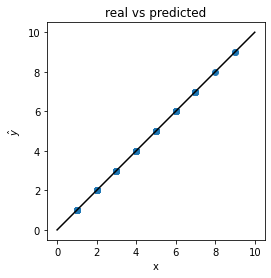

In [30]:
plt.scatter(y, yhat)
plt.plot([0, 10], [0, 10], '-k')
plt.title('real vs predicted')
plt.ylabel('$\hat{y}$')
plt.xlabel('x')
plt.axis('square')
plt.show()